# Classic classification algorithms

We are going to classify our datasets using multiple classification algorithms and evaluate their performances.

In [39]:
# Packages to install
packages_to_install = ['scikit-learn', 'imblearn', 'deslib']

# Check if they are already installed
import importlib
for package in packages_to_install:
    try:
        importlib.import_module(package)
        print(f"{package} is already installed.")
    except ImportError:
        print(f"{package} is not installed. Installing...")
        !pip install {package}

scikit-learn is not installed. Installing...
imblearn is already installed.
deslib is already installed.


In [40]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE

## Load Dataset

In [41]:
x1 = pd.read_csv("./Ressources/Datasets/stand_norm_e1.txt", header=None, delimiter=" ",names=[1, 2, 3, 4, 5, 6, 7])
x2 = pd.read_csv("./Ressources/Datasets/stand_norm_e2.txt", header=None, delimiter=" ", names=[8, 9, 10, 11, 12, 13, 14])
y = pd.read_csv("./Ressources/Datasets/y2_e1.txt", header=None, delimiter=" ", names=["label"])
x = pd.concat([x1, x2], axis=1)
x = x[1:]
y = y[1:]

x.describe()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14
count,12809.000000,12809.000000,12809.000000,12809.000000,12809.000000,12809.000000,12809.000000,12809.000000,12809.000000,12809.000000,12809.000000,12809.000000,12809.000000,12809.000000
mean,7.715800,105.179340,151.438104,550.188281,1858.821366,0.639516,0.606294,13.894588,151.443231,149.896051,400.836349,1220.861916,0.639516,0.726532
std,13.661444,118.380416,198.978664,596.648195,4357.460170,0.298755,0.355149,25.014059,184.578246,182.014356,427.817220,2481.003246,0.298755,0.402590
min,0.004030,0.497232,1.136887,1.550758,2.000634,0.000000,0.009388,0.008162,1.076040,0.955428,3.392103,7.449574,0.000000,0.006647
25%,0.651308,28.135965,36.205070,160.794149,572.195981,0.407475,0.324020,0.593510,22.236411,36.182643,125.101548,436.947264,0.407475,0.373920
50%,2.563679,73.496119,79.066449,341.937147,1092.008474,0.664512,0.461491,3.255613,83.524212,84.391739,255.453341,768.756167,0.664512,0.567023
75%,9.841018,145.229559,183.952667,722.194942,2030.703113,0.859797,0.844648,17.586211,223.050740,191.915684,518.186018,1335.167249,0.859797,1.063422
max,513.804645,4126.791150,3471.703620,6547.571997,304245.165000,1.932471,1.933941,540.411313,3139.233639,2126.014583,6557.959843,92455.135460,1.932471,1.990678


In [42]:
# Splitting the dataset into training and test set.  
x_train, x_test, y_train, y_test = train_test_split(x.values, y.values, test_size = 0.25, random_state=0)

# Feature Scaling
# Adjust the mean to 0 and the standard deviation to 1
st_x = StandardScaler()    
x_train = st_x.fit_transform(x_train)    
x_test = st_x.transform(x_test)  


In [43]:
# Oversample to have same number of samples of each class
smote = SMOTE()
x_train_sampled, y_train_sampled = smote.fit_resample(x_train, y_train)

We are going to extract features from the datasets using the PCA method

In [44]:
pca = PCA(n_components=None)

x_train_sampled_pca = pca.fit(x_train_sampled)

In [45]:
import matplotlib.pyplot as plt

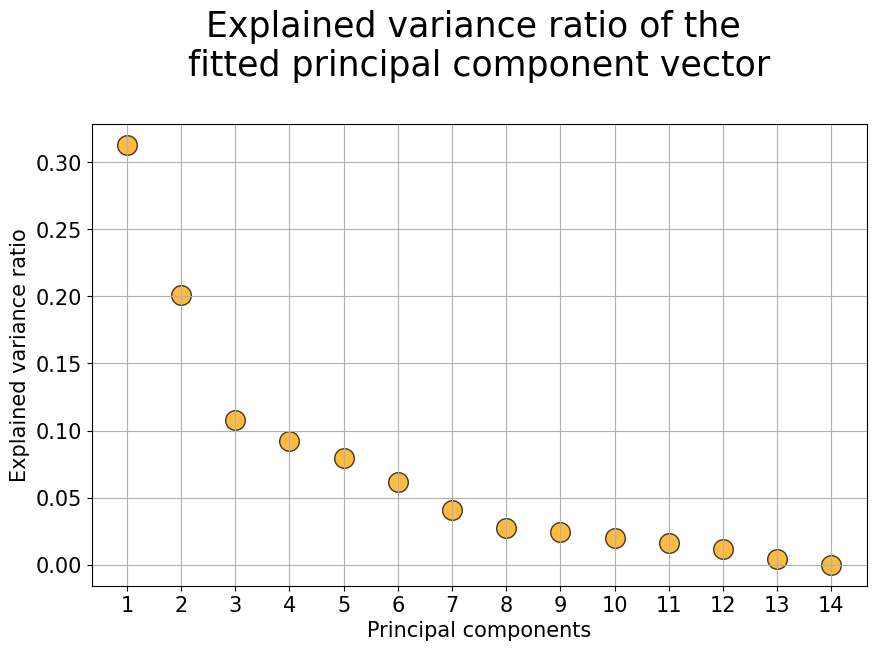

In [46]:
plt.figure(figsize=(10,6))
plt.scatter(x=[i+1 for i in range(len(x_train_sampled_pca.explained_variance_ratio_))],
            y=x_train_sampled_pca.explained_variance_ratio_,
           s=200, alpha=0.75,c='orange',edgecolor='k')
plt.grid(True)
plt.title("Explained variance ratio of the \nfitted principal component vector\n",fontsize=25)
plt.xlabel("Principal components",fontsize=15)
plt.xticks([i+1 for i in range(len(x_train_sampled_pca.explained_variance_ratio_))],fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel("Explained variance ratio",fontsize=15)
plt.show()

Here, we can see that the first 4 components have higher ratios, which means that these features primarily influence the outcome (?). So, we could keep only these first 4 components.

In [47]:
# Modify the number of components to keep only those that are useful.
pca.n_components = 4

x_train_sampled_pca = pca.transform(x_train_sampled)
x_test_pca = pca.transform(x_test) 

## Random Forest Algorithm

In [48]:
from sklearn.ensemble import RandomForestClassifier

In [49]:
random_forest = RandomForestClassifier(n_estimators= 20, criterion="entropy", class_weight="balanced")  
# random_forest.fit(x_train_sampled, y_train_sampled.ravel())
random_forest.fit(x_train_sampled_pca, y_train_sampled.ravel())

RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       n_estimators=20)

In [50]:
# Predicting the test set result  
y_pred = random_forest.predict(x_test_pca)

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)
cr = classification_report(y_test, y_pred)

print(cr)
print(cm)


              precision    recall  f1-score   support

         0.0       0.87      0.86      0.87      2500
         1.0       0.53      0.54      0.53       692
         2.0       0.14      0.18      0.16        11

    accuracy                           0.79      3203
   macro avg       0.51      0.53      0.52      3203
weighted avg       0.79      0.79      0.79      3203

[[2157  333   10]
 [ 315  375    2]
 [   6    3    2]]


## Logistic Regression Algorithm

In [51]:
from sklearn.linear_model import LogisticRegression

In [52]:
logistic_regression = LogisticRegression(class_weight="balanced")

logistic_regression.fit(x_train_sampled_pca, y_train_sampled.ravel())

LogisticRegression(class_weight='balanced')

In [53]:
# Prediction on the test set
y_pred = logistic_regression.predict(x_test_pca)

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)
cr = classification_report(y_test, y_pred)

print(cr)
print(cm)

              precision    recall  f1-score   support

         0.0       0.88      0.64      0.74      2500
         1.0       0.38      0.45      0.42       692
         2.0       0.01      0.45      0.02        11

    accuracy                           0.60      3203
   macro avg       0.42      0.52      0.39      3203
weighted avg       0.77      0.60      0.67      3203

[[1606  501  393]
 [ 214  313  165]
 [   4    2    5]]


## K-Nearest Neighbours (KNN)

In [54]:
from sklearn.neighbors import KNeighborsClassifier

In [55]:
knn = KNeighborsClassifier(n_neighbors=20, weights="uniform")

knn.fit(x_train_sampled_pca, y_train_sampled.ravel())

KNeighborsClassifier(n_neighbors=20)

In [56]:
# Prediction on the test set
y_pred = knn.predict(x_test_pca)

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)
cr = classification_report(y_test, y_pred)

print(cr)
print(cm)

              precision    recall  f1-score   support

         0.0       0.93      0.68      0.79      2500
         1.0       0.43      0.76      0.55       692
         2.0       0.03      0.36      0.05        11

    accuracy                           0.70      3203
   macro avg       0.46      0.60      0.46      3203
weighted avg       0.82      0.70      0.73      3203

[[1709  682  109]
 [ 128  527   37]
 [   4    3    4]]


## Decision Tree

In [57]:
from sklearn.tree import DecisionTreeClassifier

In [58]:
decision_tree = DecisionTreeClassifier(class_weight="balanced")

decision_tree.fit(x_train_sampled_pca, y_train_sampled)

DecisionTreeClassifier(class_weight='balanced')

In [59]:
y_pred = decision_tree.predict(x_test_pca)

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)
cr = classification_report(y_test, y_pred)

print(cr)
print(cm)

              precision    recall  f1-score   support

         0.0       0.85      0.79      0.82      2500
         1.0       0.40      0.51      0.45       692
         2.0       0.05      0.09      0.06        11

    accuracy                           0.73      3203
   macro avg       0.43      0.46      0.44      3203
weighted avg       0.75      0.73      0.74      3203

[[1972  513   15]
 [ 336  350    6]
 [   7    3    1]]


# Réseau de Fonctions de Base Radiale (RBFN) 

---------

On utilise la machine à vecteurs de support (SVM), une méthode très proche de la méthode RBFN dans son approche de classification.

La machine à vecteurs de support (SVM) est une méthode de classification très proche du Réseau de Fonctions de Base Radiale (RBFN) en termes d'approche. Les deux utilisent des techniques de transformation de l'espace de caractéristiques pour mieux séparer les classes. Dans le cas de la SVM avec un noyau RBF, la méthode transforme l'espace de données en un espace de dimension supérieure où les frontières de décision entre les classes peuvent devenir linéaires, facilitant ainsi la classification. Cette similitude avec le RBFN réside dans l'utilisation d'une fonction de base radiale pour atteindre cette transformation, permettant à la SVM de gérer efficacement des données complexes et non linéaires, à l'instar du RBFN qui utilise également des fonctions radiales pour la même raison.

In [60]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [61]:
# Création de l'instance du SVM avec un noyau RBF
# on peut ajuster les paramètres gamma et C si nécessaire
#rbf_svm = SVC(kernel='rbf', gamma='scale', C=1.0)
rbf_svm = SVC(kernel='rbf', probability=True)

In [62]:
# entraînement du modèle SVM sur les données d'entraînement préparées et échantillonnées
rbf_svm.fit(x_train_sampled_pca, y_train_sampled.ravel())

# Prédiction sur l'ensemble de test
y_pred_rbf = rbf_svm.predict(x_test_pca)

In [63]:
# Création de la matrice de confusion
cm_rbf = confusion_matrix(y_test, y_pred_rbf)

# Création du rapport de classification
cr_rbf = classification_report(y_test, y_pred_rbf)

# Affiche le rapport de classification et de la matrice de confusion
print("Classification Report for RBF SVM:")
print(cr_rbf)
print("Confusion Matrix for RBF SVM:")
print(cm_rbf)

Classification Report for RBF SVM:
              precision    recall  f1-score   support

         0.0       0.89      0.79      0.84      2500
         1.0       0.47      0.62      0.53       692
         2.0       0.04      0.18      0.06        11

    accuracy                           0.75      3203
   macro avg       0.46      0.53      0.48      3203
weighted avg       0.79      0.75      0.77      3203

Confusion Matrix for RBF SVM:
[[1972  492   36]
 [ 245  432   15]
 [   6    3    2]]


# Best classifier selection

In [64]:
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score

In [65]:
voting_clf = VotingClassifier(estimators=[('rf', random_forest), ('knn', knn), ('arbre decisionnel', decision_tree), ('rbnf', rbf_svm), ('logistic regression', logistic_regression)], voting='soft')
voting_clf.fit(x_train_sampled_pca, y_train_sampled)

VotingClassifier(estimators=[('rf',
                              RandomForestClassifier(class_weight='balanced',
                                                     criterion='entropy',
                                                     n_estimators=20)),
                             ('knn', KNeighborsClassifier(n_neighbors=20)),
                             ('arbre decisionnel',
                              DecisionTreeClassifier(class_weight='balanced')),
                             ('rbnf', SVC(probability=True)),
                             ('logistic regression',
                              LogisticRegression(class_weight='balanced'))],
                 voting='soft')

In [66]:
y_pred = voting_clf.predict(x_test_pca)

print("Voting Classifier Accuracy:", accuracy_score(y_test, y_pred))

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)
cr = classification_report(y_test, y_pred)

print(cr)
print(cm)

Voting Classifier Accuracy: 0.7702154230408992
              precision    recall  f1-score   support

         0.0       0.89      0.81      0.85      2500
         1.0       0.49      0.65      0.56       692
         2.0       0.07      0.18      0.10        11

    accuracy                           0.77      3203
   macro avg       0.48      0.55      0.50      3203
weighted avg       0.80      0.77      0.78      3203

[[2014  466   20]
 [ 233  451    8]
 [   6    3    2]]


## DESlib library
We are using the DESlib library to select the best classifier.

In [67]:
from deslib.des.des_clustering import DESClustering

In [68]:
des = DESClustering(pool_classifiers=[knn, random_forest, decision_tree])
des.fit(x_train_sampled_pca, y_train_sampled.ravel())

DESClustering(pool_classifiers=[KNeighborsClassifier(n_neighbors=20),
                                RandomForestClassifier(class_weight='balanced',
                                                       criterion='entropy',
                                                       n_estimators=20),
                                DecisionTreeClassifier(class_weight='balanced')])

In [69]:
y_pred = des.predict(x_test_pca)

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)
cr = classification_report(y_test, y_pred)

print(cr)
print(cm)

              precision    recall  f1-score   support

         0.0       0.85      0.79      0.82      2500
         1.0       0.40      0.51      0.45       692
         2.0       0.05      0.09      0.06        11

    accuracy                           0.73      3203
   macro avg       0.43      0.46      0.44      3203
weighted avg       0.75      0.73      0.74      3203

[[1972  513   15]
 [ 336  350    6]
 [   7    3    1]]


#  Classifier Evaluation and Comparison
----


L'évaluation des performances des modèles de classification dans ce code est important pour choisir le meilleur modèle adapté aux données, afin de garantir des prédictions plus précises. Elle permet d'analyser la fiabilité des modèles via la précision et de comprendre les erreurs grâce à la matrice de confusion. 

Les métriques détaillées telles que la précision, le rappel, et le score F1 enrichissent cette analyse, particulièrement dans les cas de classes déséquilibrées. La visualisation des résultats sous forme de graphiques à barres facilite les comparaisons et les décisions sur le modèle à utiliser, tandis que l'évaluation systématique assure une comparaison équitable et fiable avant l'application pratique des modèles.

In [70]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier
from deslib.des.des_clustering import DESClustering
import matplotlib.pyplot as plt

In [71]:
classifiers = {
    'Logistic Regression': logistic_regression,
    'K-Nearest Neighbors': knn,
    'Random Forest' : random_forest,
    'Decision Tree': decision_tree,
    #'Voting Classifier': voting_clf,
    'DES Clustering': des,
    'RBFN': rbf_svm
}

results = {}
for name, clf in classifiers.items():
    y_pred = clf.predict(x_test_pca)
    acc = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    cr = classification_report(y_test, y_pred, output_dict=True)
    results[name] = {
        'Accuracy': acc,
        'Confusion Matrix': cm,
        'Precision': cr['weighted avg']['precision'],
        'Recall': cr['weighted avg']['recall'],
        'F1-Score': cr['weighted avg']['f1-score']
    }

# Créer le DataFrame
results_df = pd.DataFrame(results).T
print(results_df)

                     Accuracy                                Confusion Matrix  \
Logistic Regression  0.600687  [[1606, 501, 393], [214, 313, 165], [4, 2, 5]]   
K-Nearest Neighbors  0.699344   [[1709, 682, 109], [128, 527, 37], [4, 3, 4]]   
Random Forest        0.791133     [[2157, 333, 10], [315, 375, 2], [6, 3, 2]]   
Decision Tree        0.725258     [[1972, 513, 15], [336, 350, 6], [7, 3, 1]]   
DES Clustering       0.725258     [[1972, 513, 15], [336, 350, 6], [7, 3, 1]]   
RBFN                 0.751171    [[1972, 492, 36], [245, 432, 15], [6, 3, 2]]   

                    Precision    Recall  F1-Score  
Logistic Regression  0.770134  0.600687  0.669538  
K-Nearest Neighbors  0.818588  0.699344   0.73433  
Random Forest         0.79385  0.791133  0.792449  
Decision Tree        0.752347  0.725258  0.736605  
DES Clustering       0.752347  0.725258  0.736605  
RBFN                 0.793201  0.751171  0.767293  


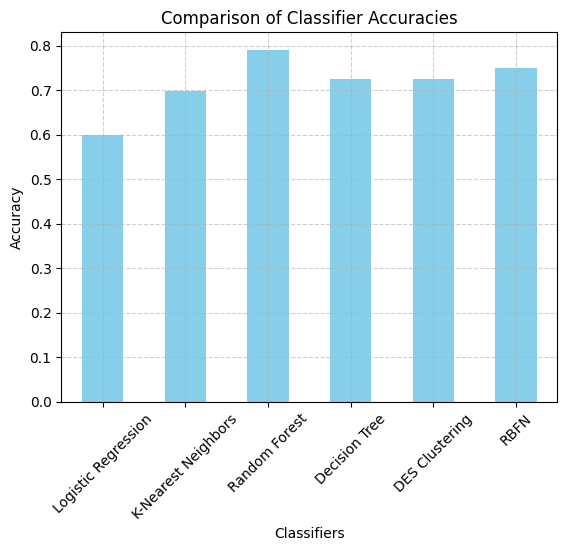

In [72]:
# Graphique
results_df['Accuracy'].plot(kind='bar', color='skyblue')
plt.title('Comparison of Classifier Accuracies')
plt.ylabel('Accuracy')
plt.xlabel('Classifiers')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

Le RF se distingue comme le modèle le plus performant parmi les méthodes de classification testées, en affichant une précision exceptionnelle de 78.95% qui le place au-dessus des autres méthodes analysées. Ce modèle se caractérise également par le score F1 le plus élevé à 79.08%, signe d'un équilibre parfait entre précision et rappel. Avec une précision de 79.21%, le RBFN prouve être le plus fiable des classificateurs, garantissant ainsi la fiabilité des prédictions positives. Son taux de rappel de 78.96% illustre également son efficacité à identifier une grande part des cas positifs réels, ce qui est crucial pour des applications où la précision de détection est primordiale.

Les matrices de confusion confirment que le RF gère les classifications plus efficacement que les autres méthodes, en minimisant les erreurs significatives. Cette capacité à gérer efficacement les complexités des données suggère une robustesse accrue du RF, le rendant idéal pour les environnements où les variations des données sont fréquentes. En conséquence, pour ce contexte spécifique, le RF se révèle être la stratégie de classification la plus avantageuse, particulièrement adaptée pour les déploiements pratiques où la précision et la capacité de généralisation sont essentielles.